# Clasifying various food items as healthy or not so healthy

## All Imports

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Read the dataset

In [135]:
df = pd.read_csv('data.csv')

In [136]:
df.head()

,name,energy(kcal),fat(g),sugar(g),fiber(g),protein(g),salt(g),target
0,Spaghetti,359.0,2.0,3.5,3.0,13.0,0.01,1
1,Lay's,442.0,13.0,5.3,6.2,5.9,0.84,0
2,Cookies,483.0,24.0,32.0,NaN,5.2,0.27,0
3,Rice,389.0,1.2,7.9,2.9,7.0,1.00,1
4,Maggi,241.0,10.8,16.3,1.5,2.7,47.30,0


In [137]:
df.shape

(40, 8)

In [138]:
df.dtypes

,0
name,object
energy(kcal),float64
fat(g),float64
sugar(g),float64
fiber(g),float64
protein(g),float64
salt(g),float64
target,int64


In [139]:
df.describe()

,energy(kcal),fat(g),sugar(g),fiber(g),protein(g),salt(g),target
count,40.000000,40.000000,38.000000,25.000000,40.000000,32.000000,40.000000
mean,281.725000,12.953050,14.722263,3.852000,6.601325,1.849813,0.575000
std,194.066336,16.087499,21.087497,7.118996,6.335595,8.308383,0.500641
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.750000,0.950000,1.022500,0.000000,1.115000,0.080000,0.000000
50%,261.500000,9.850000,5.400000,1.500000,5.550000,0.163500,1.000000
75%,444.000000,19.050000,19.250000,5.000000,10.025000,0.705000,1.000000
max,675.000000,75.000000,81.000000,34.000000,25.000000,47.300000,1.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          40 non-null     object 
 1   energy(kcal)  40 non-null     float64
 2   fat(g)        40 non-null     float64
 3   sugar(g)      38 non-null     float64
 4   fiber(g)      25 non-null     float64
 5   protein(g)    40 non-null     float64
 6   salt(g)       32 non-null     float64
 7   target        40 non-null     int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 2.6+ KB


## Missing Values

In [141]:
df.isna().values.any()

np.True_

In [142]:
df.isnull().sum()

,0
name,0
energy(kcal),0
fat(g),0
sugar(g),2
fiber(g),15
protein(g),0
salt(g),8
target,0


In [143]:
df["sugar(g)"] = df["sugar(g)"].fillna(df["sugar(g)"].median())

In [144]:
df["sugar(g)"].isna().sum()

np.int64(0)

In [145]:
df["fiber(g)"] = df["fiber(g)"].fillna(df["fiber(g)"].mean())

In [146]:
df["fiber(g)"].isna().sum()

np.int64(0)

In [147]:
df["salt(g)"] = df["salt(g)"].fillna(df["salt(g)"].mean())

In [148]:
df["salt(g)"].isna().sum()

np.int64(0)

In [149]:
df.isna().sum()

,0
name,0
energy(kcal),0
fat(g),0
sugar(g),0
fiber(g),0
protein(g),0
salt(g),0
target,0


## Duplicate Rows

In [150]:
df.duplicated().values.any()

np.False_

## EDA

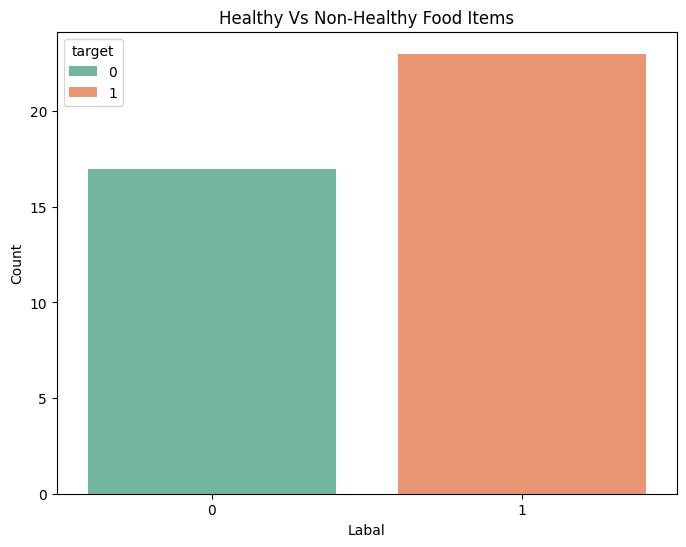

In [151]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "target", palette="Set2", hue="target")
plt.title("Healthy Vs Non-Healthy Food Items")
plt.xlabel("Labal")
plt.ylabel("Count")
plt.show()


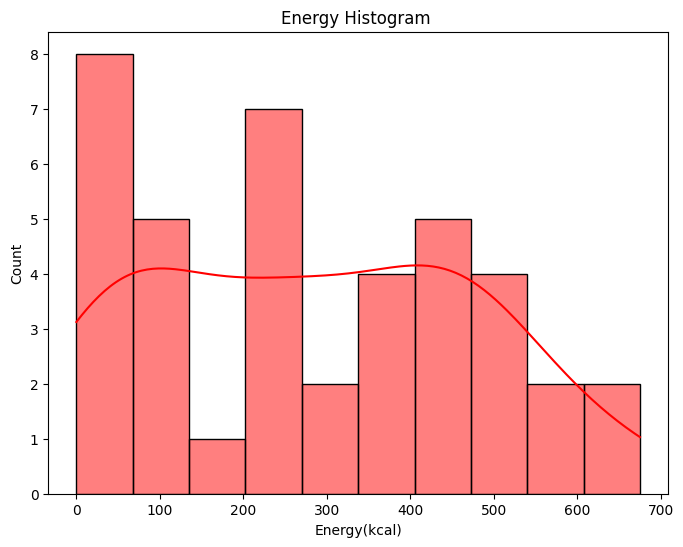

In [152]:
plt.figure(figsize = (8,6))
sns.histplot(data = df, x = "energy(kcal)", bins = 10, kde = True, color = "red")

plt.title("Energy Histogram ")
plt.xlabel("Energy(kcal)")
plt.ylabel("Count")
plt.show()

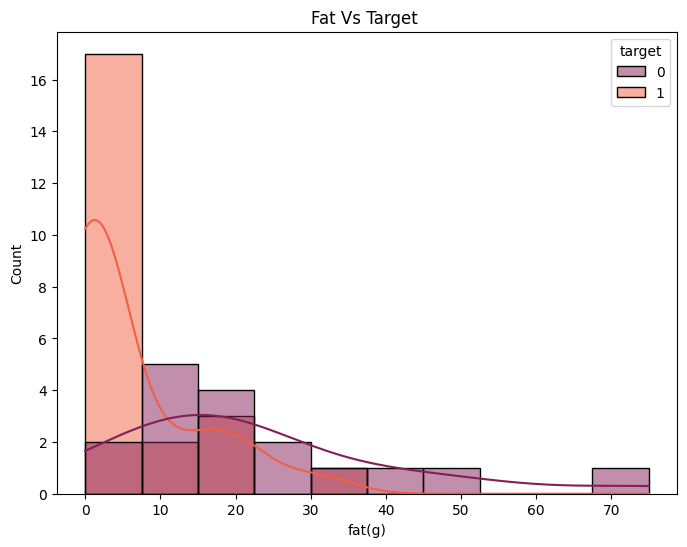

In [153]:
plt.figure(figsize= (8,6))
sns.histplot(data = df, x = "fat(g)" , bins = 10, kde = True, palette=  "rocket",hue= "target")

plt.title("Fat Vs Target ")
plt.xlabel("fat(g)")
plt.ylabel("Count")
plt.show()

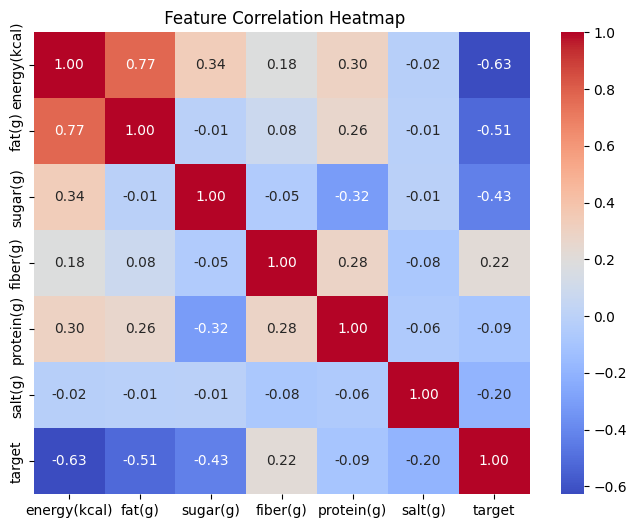

In [154]:
plt.figure(figsize= (8,6))
numeric_features = df.select_dtypes(include = np.number)
sns.heatmap(numeric_features.corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title(" Feature Correlation Heatmap")
plt.show()

## Data Preprocessing

In [155]:
X = df.drop(["target", "name"], axis = 1)
y = df["target"]


In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [157]:
X.head()

,energy(kcal),fat(g),sugar(g),fiber(g),protein(g),salt(g)
0,359.0,2.0,3.5,3.000,13.0,0.01
1,442.0,13.0,5.3,6.200,5.9,0.84
2,483.0,24.0,32.0,3.852,5.2,0.27
3,389.0,1.2,7.9,2.900,7.0,1.00
4,241.0,10.8,16.3,1.500,2.7,47.30


In [158]:
y.head()

,target
0,1
1,0
2,0
3,1
4,0


In [159]:
print(X_train)

    energy(kcal)  fat(g)  sugar(g)  fiber(g)  protein(g)    salt(g)
31         266.0   9.700      3.60     2.300       11.00   1.849813
12         494.0  21.000     27.00     3.852        7.00   0.170000
5          321.0  17.857      0.00     3.852       25.00   1.849813
6          631.0  49.000     40.00     0.000        4.80   0.140000
3          389.0   1.200      7.90     2.900        7.00   1.000000
21         257.0  18.000      0.00     0.000       10.00   0.000000
20          46.0   0.091      3.33     3.852        7.58   0.167000
34          61.0   3.000      3.40     0.800        1.10   0.098000
1          442.0  13.000      5.30     6.200        5.90   0.840000
18         277.0   2.900      1.30     9.700       10.24   1.475000
11         230.0   0.800      2.40     2.900       10.10   0.905000
37          97.0   3.000      5.40     3.852        8.00   1.849813
23         552.0  33.600      1.40     0.000        6.00   1.740000
16         465.0  20.400     11.30    12.600    

In [160]:
print(X_test)

    energy(kcal)  fat(g)  sugar(g)  fiber(g)  protein(g)   salt(g)
2          483.0  24.000    32.000     3.852       5.200  0.270000
27         360.0   0.100    76.000     3.852       0.100  0.198000
35         432.0  24.324    45.946     0.000       2.703  1.849813
30         104.0   0.300     5.400     3.852       0.500  1.849813
14         476.0  21.000    22.000     6.500       7.600  1.000000
13         108.0   0.080    22.360     0.000       1.120  0.006000
7            0.0   0.500     0.200     0.200       0.500  0.100000
24          72.0   1.700     9.000     0.000       1.900  0.000000


In [161]:
print(y_train)

31    0
12    0
5     1
6     0
3     1
21    0
20    1
34    1
1     0
18    1
11    1
37    1
23    0
16    1
19    1
4     0
22    1
32    1
10    1
38    1
39    0
8     0
26    1
17    0
33    0
29    1
25    0
28    1
0     1
15    0
36    1
9     0
Name: target, dtype: int64


In [162]:
print(y_test)

2     0
27    0
35    0
30    1
14    1
13    1
7     1
24    1
Name: target, dtype: int64


In [163]:
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [164]:
print(X_train)

[[3.90461997e-01 1.29333333e-01 4.44444444e-02 6.76470588e-02
  4.40000000e-01 3.91080867e-02]
 [7.30253353e-01 2.80000000e-01 3.33333333e-01 1.13294118e-01
  2.80000000e-01 3.59408034e-03]
 [4.72429210e-01 2.38093333e-01 0.00000000e+00 1.13294118e-01
  1.00000000e+00 3.91080867e-02]
 [9.34426230e-01 6.53333333e-01 4.93827160e-01 0.00000000e+00
  1.92000000e-01 2.95983087e-03]
 [5.73770492e-01 1.60000000e-02 9.75308642e-02 8.52941176e-02
  2.80000000e-01 2.11416490e-02]
 [3.77049180e-01 2.40000000e-01 0.00000000e+00 0.00000000e+00
  4.00000000e-01 0.00000000e+00]
 [6.25931446e-02 1.21333333e-03 4.11111111e-02 1.13294118e-01
  3.03200000e-01 3.53065539e-03]
 [8.49478390e-02 4.00000000e-02 4.19753086e-02 2.35294118e-02
  4.40000000e-02 2.07188161e-03]
 [6.52757079e-01 1.73333333e-01 6.54320988e-02 1.82352941e-01
  2.36000000e-01 1.77589852e-02]
 [4.06855440e-01 3.86666667e-02 1.60493827e-02 2.85294118e-01
  4.09600000e-01 3.11839323e-02]
 [3.36810730e-01 1.06666667e-02 2.96296296e-02 8.5

In [165]:
print(X_test)

[[ 7.13859911e-01  3.20000000e-01  3.95061728e-01  1.13294118e-01
   2.08000000e-01  5.70824524e-03]
 [ 5.30551416e-01  1.33333333e-03  9.38271605e-01  1.13294118e-01
   4.00000000e-03  4.18604651e-03]
 [ 6.37853949e-01  3.24320000e-01  5.67234568e-01  0.00000000e+00
   1.08120000e-01  3.91080867e-02]
 [ 1.49031297e-01  4.00000000e-03  6.66666667e-02  1.13294118e-01
   2.00000000e-02  3.91080867e-02]
 [ 7.03427720e-01  2.80000000e-01  2.71604938e-01  1.91176471e-01
   3.04000000e-01  2.11416490e-02]
 [ 1.54992548e-01  1.06666667e-03  2.76049383e-01  0.00000000e+00
   4.48000000e-02  1.26849894e-04]
 [-5.96125186e-03  6.66666667e-03  2.46913580e-03  5.88235294e-03
   2.00000000e-02  2.11416490e-03]
 [ 1.01341282e-01  2.26666667e-02  1.11111111e-01  0.00000000e+00
   7.60000000e-02  0.00000000e+00]]


## Train The Model

In [166]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate The Model

In [167]:
y_pred = model.predict(X_test)

In [168]:
print(accuracy_score(y_test, y_pred))

0.875


In [169]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



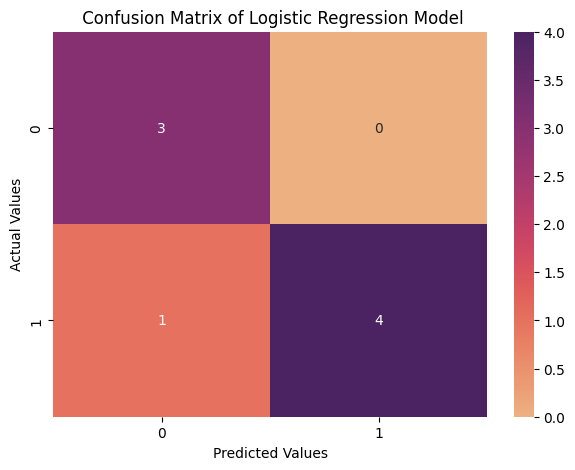

In [170]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize= (7,5))

sns.heatmap(data = cm, annot = True, cmap = "flare")
plt.title(" Confusion Matrix of Logistic Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## Predict of an New Food Item

In [171]:
sample = {
    "name" : "Watermelon",
    "energy(kcal)" : 30.0,
    "fat(g)" : 0.2,
    "sugar(g)" : 6.2,
    "fiber(g)" : 0.4,
    "protein(g)" : 0.6,
    "salt(g)" : 0.001
}


In [172]:
sample_df = pd.DataFrame(sample, index = [0])

In [173]:
sample_df.head()

,name,energy(kcal),fat(g),sugar(g),fiber(g),protein(g),salt(g)
0,Watermelon,30.0,0.2,6.2,0.4,0.6,0.001


In [174]:
sample_df = sample_df.drop(["name"], axis = 1)

In [175]:
X_sample = scalar.transform(sample_df)


In [176]:
pred = model.predict(X_sample)

In [177]:
print(pred)

[1]
